In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
print(dataframe)
data_values = dataframe.values # 768 samples, 9 features

     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
5       5   116    74     0     0  25.6  0.201   30      0
6       3    78    50    32    88  31.0  0.248   26      1
7      10   115     0     0     0  35.3  0.134   29      0
8       2   197    70    45   543  30.5  0.158   53      1
9       8   125    96     0     0   0.0  0.232   54      1
10      4   110    92     0     0  37.6  0.191   30      0
11     10   168    74     0     0  38.0  0.537   34      1
12     10   139    80     0     0  27.1  1.441   57      0
13      1   189    60    23   846  30.1  0.398   59      1
14      5   166    72    19   175  25.8  0.587   51      1
15      7   100     0     0     0  30.0  0.484   32     

In [3]:
print(data_values)
print(data_values.shape)

[[   6.     148.      72.    ...,    0.627   50.       1.   ]
 [   1.      85.      66.    ...,    0.351   31.       0.   ]
 [   8.     183.      64.    ...,    0.672   32.       1.   ]
 ..., 
 [   5.     121.      72.    ...,    0.245   30.       0.   ]
 [   1.     126.      60.    ...,    0.349   47.       1.   ]
 [   1.      93.      70.    ...,    0.315   23.       0.   ]]
(768, 9)


In [4]:
feature_matrix = data_values[:,0:8] #Without classification
labels = data_values[:,8] #Labels (classification)
print(len(labels))

768


In [5]:
#Use the first X elements as train and the otherones as test data
train_features = feature_matrix[:450] #SYNTAX: array[start:stop:step]
train_labels = labels[:450]

test_features = feature_matrix[450:]
test_labels = labels[450:]

In [6]:
#Train "weak" classifier as decision tree
clf = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)#from sckit learn
clf.fit(train_features,train_labels)
clf_error_train = clf.score(train_features, train_labels)
clf_error_test = clf.score(test_features,test_labels)
print(clf_error_train)
print(clf_error_test)

0.922222222222
0.691823899371


In [7]:
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

In [8]:
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')
    plt.show()

In [15]:
#EXCERSICE 2
#Implement the adaboost algorithm
def adaboost_clf(train_features, train_labels, test_features, test_labels, M, clf):
    #M is the number of iterations
    #clf is the decision tree classifier
    n_train, n_test = len(train_features), len(test_features)
    # Set initial weights, for each datapoint = 1/n
    w = np.ones(n_train) / n_train #np.ones returns array of ones
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    # Step 1 / 6
    for i in range(M):
        # Step 2 
        # Fit a classifier with the specific weights
        clf.fit(train_features, train_labels, sample_weight=w)
    
        pred_train_i = clf.predict(train_features) 
        pred_test_i = clf.predict(test_features)     
        
        #Calculate empiric error
        # Step 3
        # Indicator function which represents the missclassification of weak classifier
        
        miss = [float(pred_train_i[x] != train_labels[x]) for x in range(0,len(pred_train_i))]
        
        # Equivalent with 1/-1 to update weights
        miss2 = np.array([x if x==1 else -1 for x in miss])
        # Error 
        err_m = np.dot(w,miss) / sum(w)
        # Step 4
        # Alpha
        alpha_m = 0.5*np.log((1-err_m)/float(err_m))
        # Step 5
        # New weights
        w = w*np.exp(miss2*alpha_m)
        w = w / np.sum(w)
        # Ergebnis: 
        # Add to prediction
        pred_train = pred_train + alpha_m*pred_train_i
        pred_test = pred_test + alpha_m*pred_test_i
    #write´the sign of the predictions
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, train_labels), \
           get_error_rate(pred_test, test_labels)

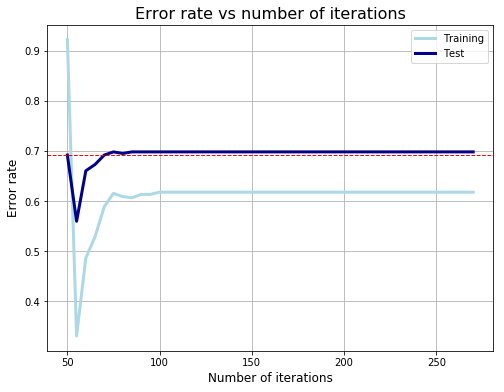

In [16]:
er_train, er_test = [clf_error_train], [clf_error_test]
# Fit Adaboost classifier using a decision tree as base estimator
 # Test with different number of iterations
x_range = range(10,450,10)
for i in x_range:
        er_i = adaboost_clf(train_features, train_labels, test_features, test_labels, i, clf)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)